<a href="https://colab.research.google.com/github/annasroka10/Capstone-project/blob/main/Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***About this dataset***
The dataset represents eCommerce transactions processed by Paypal in the financial year 2025. The majority are completed successfully through an automated system. However, approximately 0.1% of transactions fail due to various errors, and my role is to investigate the causes and ensure proper resolution and action.
This dataset consists of 38 columns and 4559 rows and the analysis is performed biweekly. I would like to focus on addressing key questions:

•	What are the main reasons for transaction failures?

•	How long does it take to resolve unsuccessful transactions?

•	Does the total transaction value significantly impact the business?

•	What is the main currency that fails and is there any relation between currency and actions taken to resolve them?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Importing data to Python.
df = pd.read_csv('Paypal - Capstone project FY25_1.csv')
df.head()

,Company Code,Account,Document Type,Posting Date,Document Date,Amount in doc. curr.,Document currency,Amount in local currency,Local Currency,Text/Billing doc,...,Status,Cnxd,VBAK PO,BSID - Account,BSID Doc,BSID Amount,Diff.,USD Diff,Diff. %,ZAR_PAY_REPORT
0,Europe,101071,DC,1/30/2025,1/30/2025,-0.76,EUR,-0.79,USD,2999581807,...,SUCCESS,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US,101053,DC,2/1/2025,2/1/2025,-22.99,USD,-22.99,USD,3001829827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Europe,101077,DC,2/2/2025,2/2/2025,-29.1,NZD,-16.46,USD,3001018491,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US,101053,DC,2/3/2025,2/3/2025,-12.99,USD,-12.99,USD,3003030347,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Europe,101071,DC,2/5/2025,2/5/2025,-19.34,EUR,-20.15,USD,2994975530,...,SUCCESS,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ***Inspecting and Cleaning Dataframe Structure***

In [3]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Average'] = desc['mean'].apply(lambda x: round(x, 2)).values
    summ['Standard Deviation'] = [round(x, 2) for x in desc['std'].values]

    display(summ)

summary(df)

data shape: (4552, 38)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Average,Standard Deviation
Company Code,object,0,0.000000,7,2,4552,NaN,NaN
Account,int64,0,0.000000,7,6,4552,1.011004e+05,9.064000e+01
Document Type,object,0,0.000000,7,3,4552,NaN,NaN
Posting Date,object,0,0.000000,7,118,4552,NaN,NaN
Document Date,object,0,0.000000,7,117,4552,NaN,NaN
Amount in doc. curr.,object,0,0.000000,7,1279,4552,NaN,NaN
Document currency,object,0,0.000000,7,17,4552,NaN,NaN
Amount in local currency,object,0,0.000000,7,1856,4552,NaN,NaN
Local Currency,object,0,0.000000,7,1,4552,NaN,NaN
Text/Billing doc,object,392,0.086116,7,3500,4160,NaN,NaN


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Account,4552.0,1.011004e+05,9.063652e+01,1.010530e+05,1.010530e+05,1.010710e+05,1.010720e+05,1.013260e+05
Cost Center,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Business Area,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tax Code,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Posting period,4552.0,2.611380e+00,1.992379e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.200000e+01
Fiscal Year,4552.0,2.024967e+03,1.779561e-01,2.024000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03
Clearing Document,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reason code,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aging,4552.0,9.563928e+00,1.040553e+01,2.000000e+00,2.000000e+00,5.000000e+00,1.300000e+01,7.100000e+01
Sign,4552.0,-2.926186e-01,9.563343e-01,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
#We will drop columns that have no data:

df.drop(columns=['Cost Center','Business Area','Clearing Document','Reason code','Tax Code'],inplace=True)

In [6]:
# Fill in NaN ZAR_PAY_REPORT with the "Not in Bibit"
df['ZAR_PAY_REPORT'] = df['ZAR_PAY_REPORT'].fillna("Not in Bibit")
df.head()

,Company Code,Account,Document Type,Posting Date,Document Date,Amount in doc. curr.,Document currency,Amount in local currency,Local Currency,Text/Billing doc,...,Status,Cnxd,VBAK PO,BSID - Account,BSID Doc,BSID Amount,Diff.,USD Diff,Diff. %,ZAR_PAY_REPORT
0,Europe,101071,DC,1/30/2025,1/30/2025,-0.76,EUR,-0.79,USD,2999581807,...,SUCCESS,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not in Bibit
1,US,101053,DC,2/1/2025,2/1/2025,-22.99,USD,-22.99,USD,3001829827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not in Bibit
2,Europe,101077,DC,2/2/2025,2/2/2025,-29.1,NZD,-16.46,USD,3001018491,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not in Bibit
3,US,101053,DC,2/3/2025,2/3/2025,-12.99,USD,-12.99,USD,3003030347,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not in Bibit
4,Europe,101071,DC,2/5/2025,2/5/2025,-19.34,EUR,-20.15,USD,2994975530,...,SUCCESS,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not in Bibit


In [7]:
#dropping null values in the AR Comments column since this is the major column analysis we will focus on.
df.dropna(subset=['AR Comments'])


,Company Code,Account,Document Type,Posting Date,Document Date,Amount in doc. curr.,Document currency,Amount in local currency,Local Currency,Text/Billing doc,...,Status,Cnxd,VBAK PO,BSID - Account,BSID Doc,BSID Amount,Diff.,USD Diff,Diff. %,ZAR_PAY_REPORT
0,Europe,101071,DC,1/30/2025,1/30/2025,-0.76,EUR,-0.79,USD,2999581807,...,SUCCESS,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not in Bibit
1,US,101053,DC,2/1/2025,2/1/2025,-22.99,USD,-22.99,USD,3001829827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not in Bibit
2,Europe,101077,DC,2/2/2025,2/2/2025,-29.1,NZD,-16.46,USD,3001018491,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not in Bibit
3,US,101053,DC,2/3/2025,2/3/2025,-12.99,USD,-12.99,USD,3003030347,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not in Bibit
4,Europe,101071,DC,2/5/2025,2/5/2025,-19.34,EUR,-20.15,USD,2994975530,...,SUCCESS,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not in Bibit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4547,US,101053,DC,12/10/2024,12/10/2024,21.24,USD,21.24,USD,2953805014,...,SUCCESS,NaN,NaN,1450444.0,6.612726e+09,-21.24,0.00,0.0,0%,Not in Bibit
4548,US,101053,DC,12/10/2024,12/10/2024,5.29,USD,5.29,USD,2953860763,...,SUCCESS,NaN,NaN,1450444.0,6.612750e+09,-21.19,-15.90,-15.9,75%,Not in Bibit
4549,US,101053,DC,12/10/2024,12/10/2024,29.99,USD,29.99,USD,2953898516,...,SUCCESS,NaN,NaN,1450444.0,6.612769e+09,-29.99,0.00,0.0,0%,Not in Bibit
4550,US,101053,DC,12/10/2024,12/10/2024,7.61,USD,7.61,USD,2953749017,...,SUCCESS,NaN,NaN,1450444.0,6.612698e+09,-7.61,0.00,0.0,0%,Not in Bibit


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4552 entries, 0 to 4551
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Company Code              4552 non-null   object 
 1   Account                   4552 non-null   int64  
 2   Document Type             4552 non-null   object 
 3   Posting Date              4552 non-null   object 
 4   Document Date             4552 non-null   object 
 5   Amount in doc. curr.      4552 non-null   object 
 6   Document currency         4552 non-null   object 
 7   Amount in local currency  4552 non-null   object 
 8   Local Currency            4552 non-null   object 
 9   Text/Billing doc          4160 non-null   object 
 10  Assignment                4552 non-null   object 
 11  Posting period            4552 non-null   int64  
 12  Fiscal Year               4552 non-null   int64  
 13  Document Header Text      4552 non-null   object 
 14  Clearing

In [9]:
#dropping null values in the Action column since this is the major column analysis we will focus on.
df.dropna(subset=['Action'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4552 entries, 0 to 4551
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Company Code              4552 non-null   object 
 1   Account                   4552 non-null   int64  
 2   Document Type             4552 non-null   object 
 3   Posting Date              4552 non-null   object 
 4   Document Date             4552 non-null   object 
 5   Amount in doc. curr.      4552 non-null   object 
 6   Document currency         4552 non-null   object 
 7   Amount in local currency  4552 non-null   object 
 8   Local Currency            4552 non-null   object 
 9   Text/Billing doc          4160 non-null   object 
 10  Assignment                4552 non-null   object 
 11  Posting period            4552 non-null   int64  
 12  Fiscal Year               4552 non-null   int64  
 13  Document Header Text      4552 non-null   object 
 14  Clearing

# ***ANALYSIS***

We will try to answer the first question: What are the main reasons for transaction failures?Before we do that, we will detect outliers using boxplot.

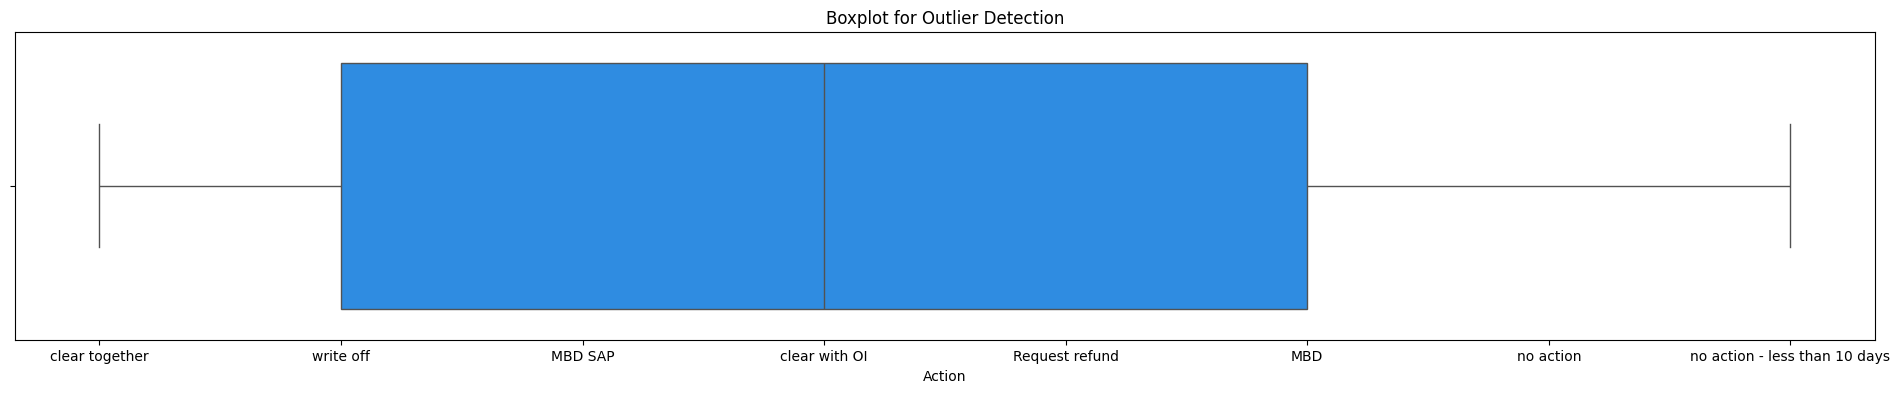

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(24, 4))
sns.boxplot(x=df['Action'], color='#118DFF')
plt.title("Boxplot for Outlier Detection")
plt.show()

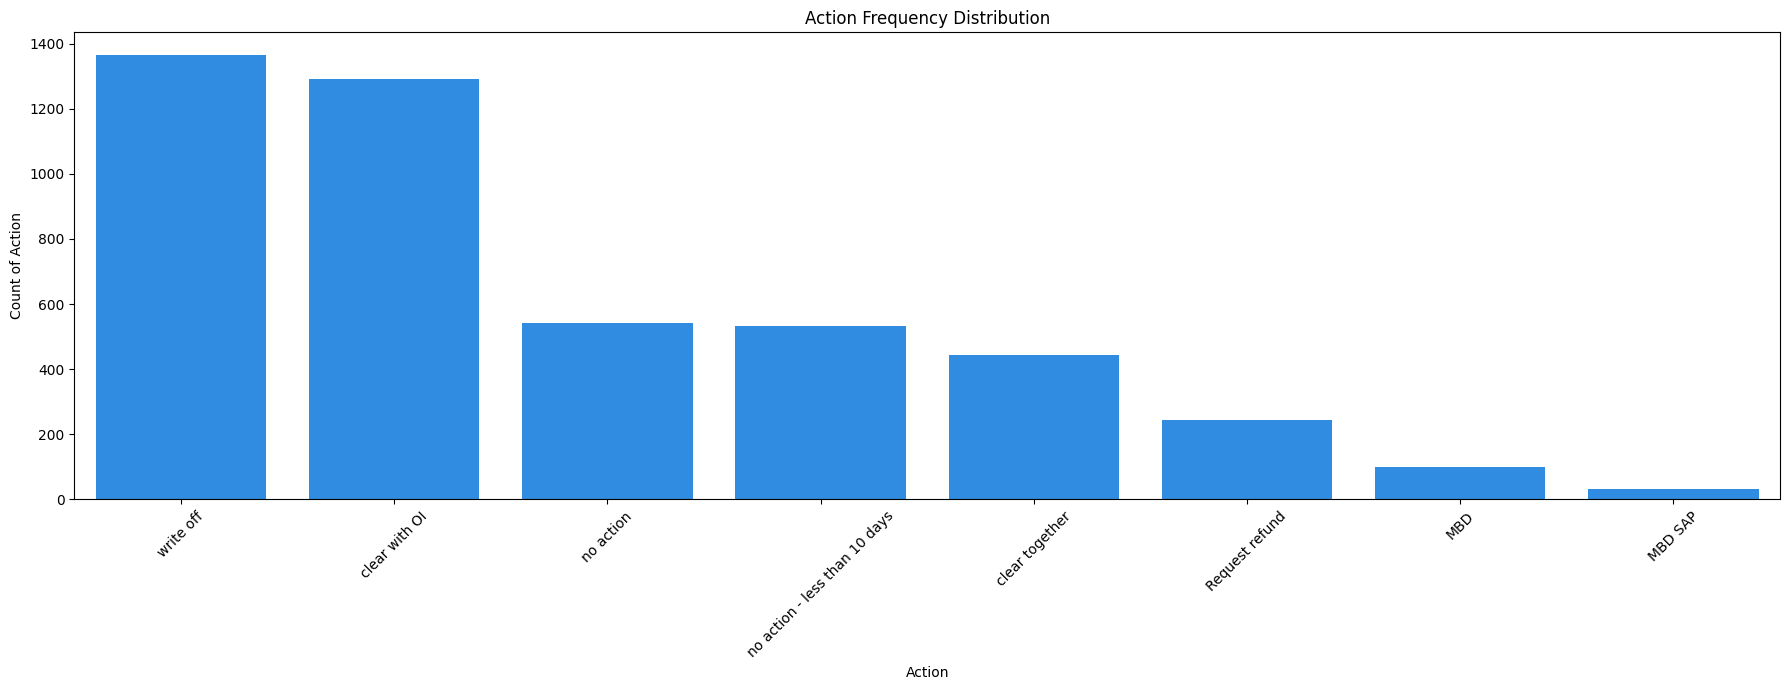

<Figure size 640x480 with 0 Axes>

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
order = df['Action'].value_counts().index
fig, ax = plt.subplots(figsize=(18, 7))
sns.countplot(data=df, x='Action', order=order, ax=ax, color='#118DFF')
plt.title("Action Frequency Distribution")
plt.xticks(rotation=45)  # Optional: rotate x-labels for readability
plt.ylabel('Count of Action')
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()


From the above barplot we can see that items with action name "no action" and "no action - less than 10 days" should be standarised. By default, all items defied as "no action" also should have AR Comment as "less than 10 days". Lets standarise those transactions.

In [20]:
replace_dict = {
    'no action - less than 10 days': 'no action',
}

df['Action'] = df['Action'].replace(replace_dict)

In [21]:
replace_dict = {
    'cnx invoice/no rebilling': 'cnx inv/no rebilling',
    'manual refund - old invoices': 'manual refund',
    'manual refund': 'Manual refund',
    'manual refund - old invoices from 2023 & early 2024, CM is not issued': 'manual refund',
    'Settlement reversed': 'Settlement reversed/chargeback',
    'settlement reversed': 'Settlement reversed/chargeback',
    }

df['AR Comments'] = df['AR Comments'].replace(replace_dict)

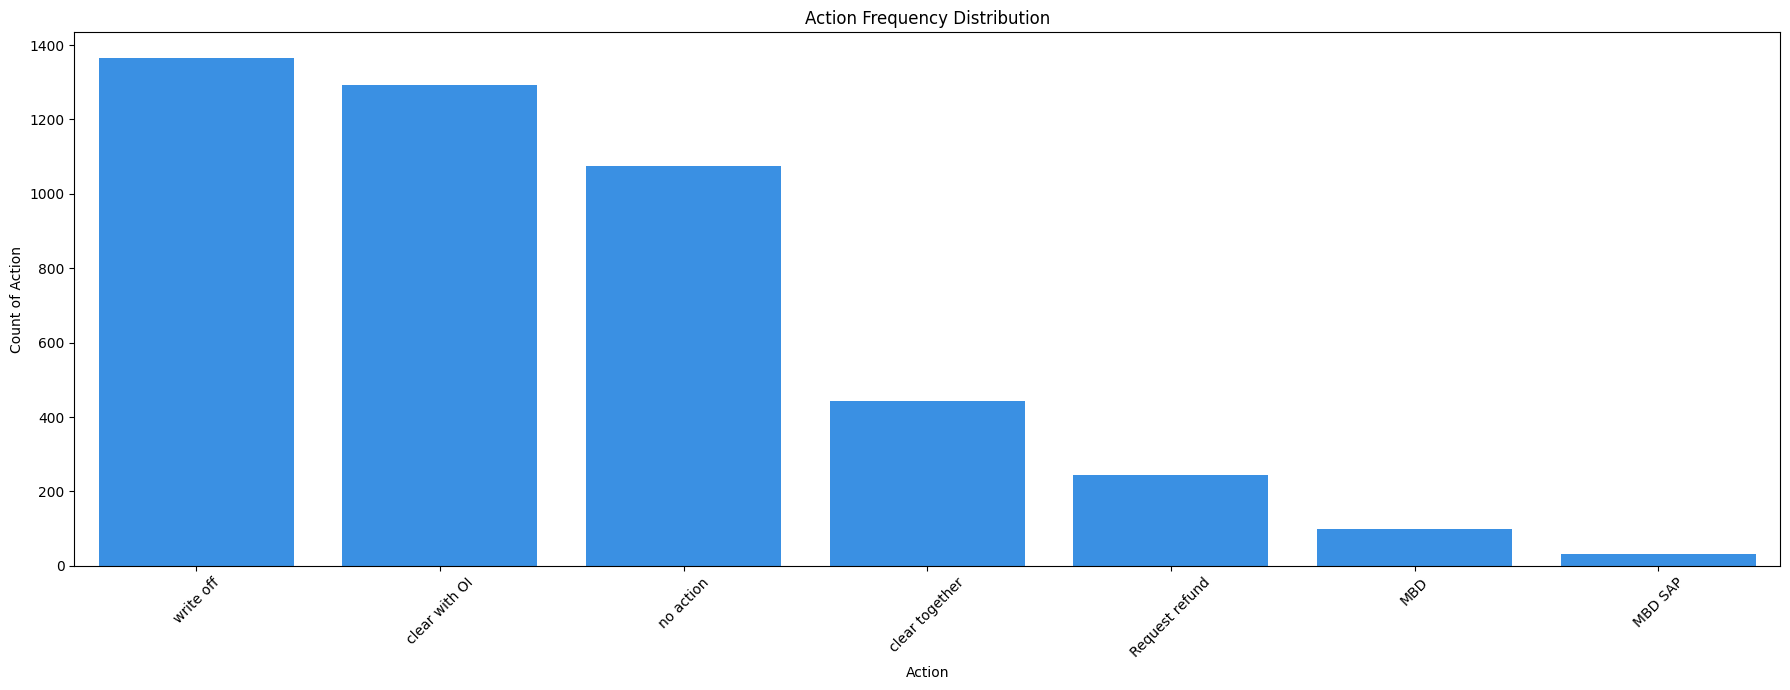

<Figure size 640x480 with 0 Axes>

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
order = df['Action'].value_counts().index
fig, ax = plt.subplots(figsize=(18, 7))
sns.countplot(data=df, x='Action', order=order, ax=ax, color='dodgerblue')
plt.title("Action Frequency Distribution")
plt.xticks(rotation=45)  # Optional: rotate x-labels for readability
plt.ylabel('Count of Action')
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()


In [27]:
action_counts = df[df['Action'] == 'no action']['AR Comments'].value_counts()
print(action_counts)

AR Comments
less than 10 days               539
clear with OI/write off diff    514
clear with OI                    14
DP - refund in PP                 5
cnx inv/no rebilling              2
Invoice cancelled                 1
Name: count, dtype: int64


*Converting Categorical Features to Numerical*

What is the main currency that fails and is there any relation between currency and actions taken to resolve them?

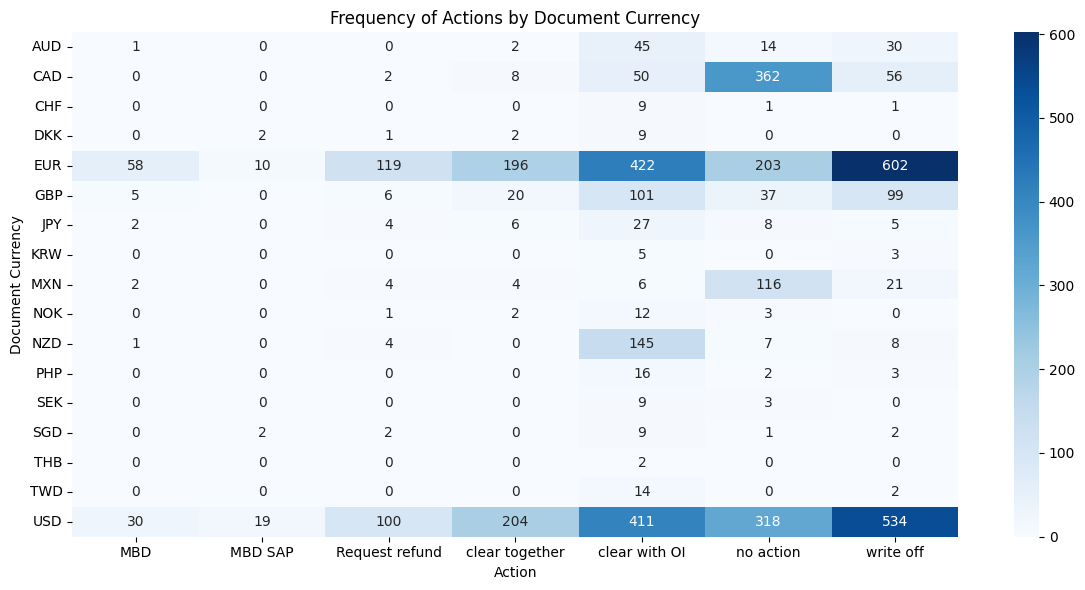

In [23]:
# Create a crosstab (frequency table) of currency vs action
crosstab = pd.crosstab(df['Document currency'], df['Action'])


# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(crosstab, cmap='Blues', annot=True, fmt='g')  # fmt='g' handles integers
plt.title("Frequency of Actions by Document Currency")
plt.xlabel("Action")
plt.ylabel("Document Currency")
plt.tight_layout()
plt.savefig('currency_action_crosstab')
plt.show()

The heatmap reveals a strong correlartion between certain currencies — USD, EUR, CAD, GBP, MXN, and NZD — and specific actions such as write off, no action, clear with OI, clear together, and request refund.

Among these, "write off" emerges as the most frequently taken action. Diving deeper into this category, the most common reason for a write-off is manual refund. These refunds are typically processed by the refund team following a request from customer service, often based on prior agreements made between the customer and the company.

This trend suggests a notable volume of customer dissatisfaction, raising the question: Why are so many customers requesting refunds? Investigating the root causes behind these cases could provide valuable insights and improvement opportunities.

The second most frequent write-off category is settlement reversed/chargeback, which again points to customer dissatisfaction. In these cases, customers reverse payments directly through PayPal, bypassing internal resolution processes. This further highlights potential issues in the customer journey or post-sale experience that merit closer examination.

In [29]:
# Get write-off reason counts
action_counts = df[df['Action'] == 'write off']['AR Comments'].value_counts()

# Convert to a DataFrame
action_table = action_counts.reset_index()
action_table.columns = ['Write-Off Reason (AR Comments)', 'Count']

# Format header row to be bold
styled_table = action_table.style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])

# Display the styled table
display(styled_table)


,Write-Off Reason (AR Comments),Count
0,Manual refund,1022
1,Settlement reversed/chargeback,239
2,cnx inv/no rebilling,66
3,order not in ECC - Unable to update PaymentInstrument due to invalid contract id,10
4,misc/other,6
5,misc - CM cleared,5
6,cancelled with customer cancel(HC).,4
7,Invoice cancelled,3
8,Contract cancelled immediately after creation,2
9,Refund Declined,2


In [22]:
df.to_csv('amended_Paypal - Capstone project FY25_1.csv', index=False)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4552 entries, 0 to 4551
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Company Code              4552 non-null   object 
 1   Account                   4552 non-null   int64  
 2   Document Type             4552 non-null   object 
 3   Posting Date              4552 non-null   object 
 4   Document Date             4552 non-null   object 
 5   Amount in doc. curr.      4552 non-null   object 
 6   Document currency         4552 non-null   object 
 7   Amount in local currency  4552 non-null   object 
 8   Local Currency            4552 non-null   object 
 9   Text/Billing doc          4160 non-null   object 
 10  Assignment                4552 non-null   object 
 11  Posting period            4552 non-null   int64  
 12  Fiscal Year               4552 non-null   int64  
 13  Document Header Text      4552 non-null   object 
 14  Clearing